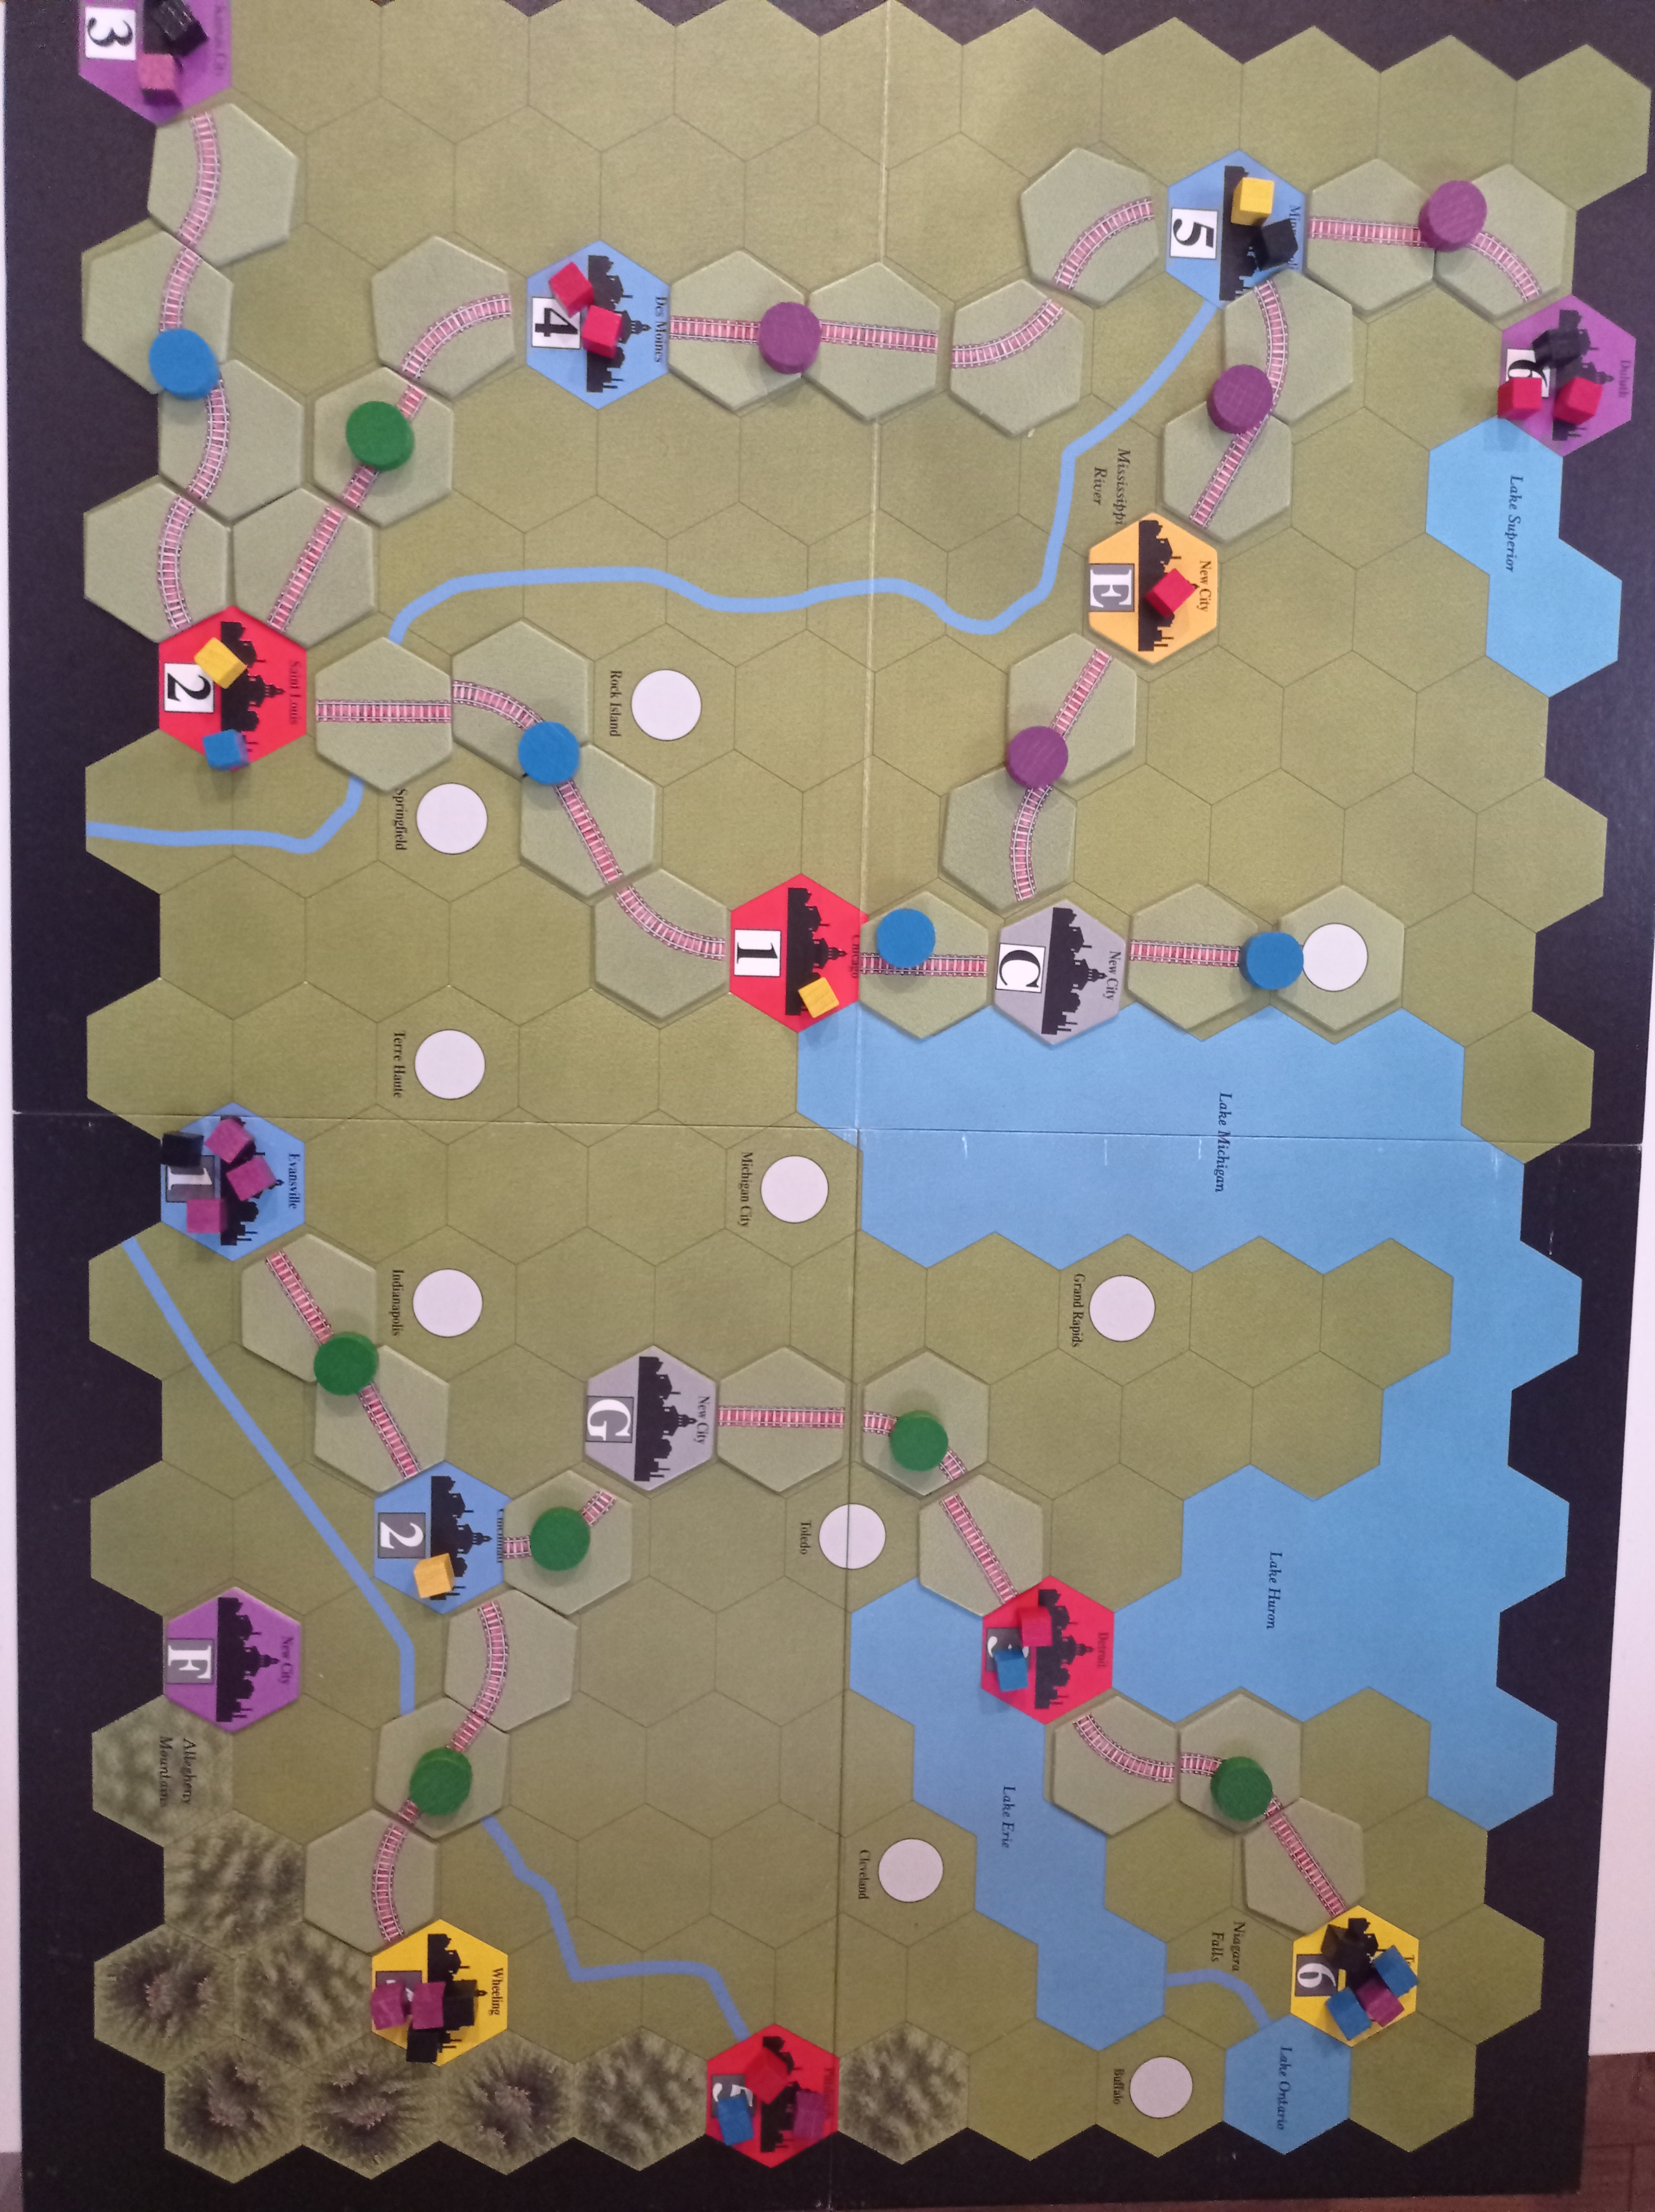

In [2]:
from IPython.display import Image, display
display(Image(filename='test.jpg'))

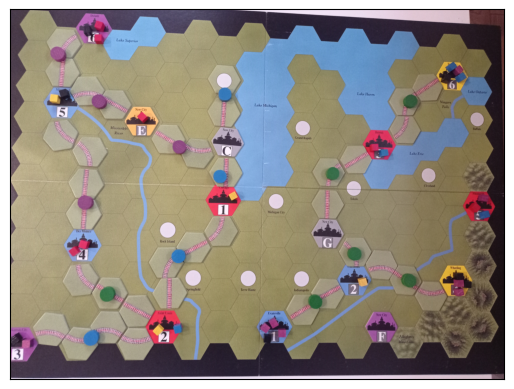

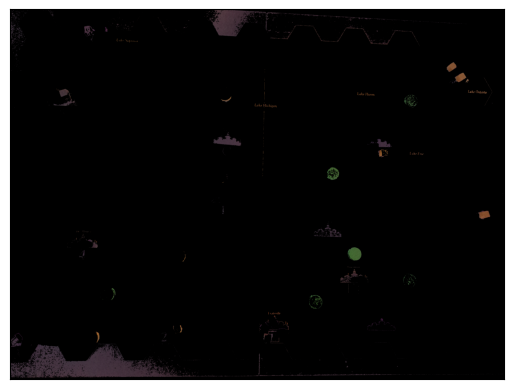

In [25]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Read image. 
img = cv2.imread('test.jpg', cv2.IMREAD_COLOR) 
  
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 80, 
               param2 = 20, minRadius = 40, maxRadius = 70) 

# hsvFrame = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
# kernel = np.ones((5, 5), "uint8") 

# #red_lower = np.array([136, 87, 111], np.uint8) 
# #red_upper = np.array([180, 255, 255], np.uint8) 
# red_lower = np.array([25, 146, 190], np.uint8) 
# red_upper = np.array([62, 174, 250], np.uint8) 
# red_mask = cv2.inRange(hsvFrame, red_lower, red_upper) 

# red_mask = cv2.dilate(red_mask, kernel) 
# res_red = cv2.bitwise_and(img, img, mask = red_mask) 
  
# contours, hierarchy = cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
# for pic, contour in enumerate(contours): 
#         area = cv2.contourArea(contour) 
#         if(area > 300): 
#             x, y, w, h = cv2.boundingRect(contour) 
#             imageFrame = cv2.rectangle(img, (x, y),  
#                                        (x + w, y + h),  
#                                        (0, 0, 255), 10) 

lower = np.array([60, 20, 0], np.uint8) 
upper = np.array([250, 110, 70], np.uint8) 
mask = cv2.inRange(img, lower, upper)
output = cv2.bitwise_and(img, img, mask = mask)

# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        #cv2.circle(img, (a, b), r, (0, 255, 0), 20) 
  
        # Draw a small circle (of radius 1) to show the center. 
        #cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    
    plt.imshow(output)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()